In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jupyter_black

jupyter_black.load()

In [3]:
import numpy as np

from acoustics.constants import speed_of_sound
from acoustics.plot import compare_impulse_responses
from acoustics.rew import rew_impulse_responses

In [4]:
impulse_responses = {}
for directory in ("2024-04-24_qrd",):
    directory = f"data/{directory}"
    impulse_responses.update(rew_impulse_responses(directory))

rate = next(iter(impulse_responses.values()))["rate"]

## Comparing absorption vs diffusion at first reflection

Looking at the impact of placing porous absorbent or quadratic residue diffuser at the left channel's first reflection point. The speakers are placed very near the walls of the room to avoid their being in front of the front projection screen which also results in a spread between left & right that works well with the distance from the listening positions. 

The SPL and decay times are not interesting here as the single absorber doesn't add much overall absorption and the single QRD is redistributing energy to some degree rather than absorbing it. Based on that we'll focus on the impulse response

### First reflection timing

The following section works out the rough distances and travel times for the direct and first reflection sound. It's based on a Fusion 360 model of the room which is as close as reasonably possible to reality, but it's obviously not exact and we're dealing with pretty small dimensions due to the proximity to the wall.

It's also worth noting that due to the proximity the angle of incidence is fairly steep thus reducing the effectiveness of both treatment options. That said as we'll see they both still have a useful impact.

<img src="../images/first-reflection-left.png" width=500/>

In [5]:
direct_to_p1 = 3.574049
print(f"Distance from the left channel directly to p1 {direct_to_p1:0.3f}m")
speaker_to_wall = 0.604883
wall_to_p1 = 3.303411
first_reflection_to_p1 = speaker_to_wall + wall_to_p1
print(
    f"Distance traveled by sound hitting the first reflection point {first_reflection_to_p1:0.3f}m"
)
first_reflection_extra_distance = first_reflection_to_p1 - direct_to_p1
print(
    f"Extra distance travled by sound via first reflection {first_reflection_extra_distance:0.3f}m"
)
t_d = direct_to_p1 / speed_of_sound
print(f"Direct travel time {t_d*1000:0.2f}ms")
t_fr = first_reflection_to_p1 / speed_of_sound
print(f"First reflection time {t_fr*1000:0.2f}ms")
Δ_fr = t_fr - t_d
print(f"Extra travel time for the first reflection is {Δ_fr*1000:0.3f}ms")

Distance from the left channel directly to p1 3.574m
Distance traveled by sound hitting the first reflection point 3.908m
Extra distance travled by sound via first reflection 0.334m
Direct travel time 10.42ms
First reflection time 11.39ms
Extra travel time for the first reflection is 0.974ms


### Porous Absorber

Prototype 4'x2'x3" Rockwool Safe & Sound with a 1" airgap.

<img src="../images/first-reflection-porous.jpg" width=500/>

We see exactly what we'd expect to see here. There's a noticible drop in the impulse response +/- 1ms due to the 

In [6]:
def compare(a, b, title, tmax=1.0):
    a_data = impulse_responses[a]["data"][impulse_responses[a]["start"] :]
    b_data = impulse_responses[b]["data"][impulse_responses[b]["start"] :]
    ax = compare_impulse_responses(rate, a, a_data, b, b_data, title, tmax=tmax)

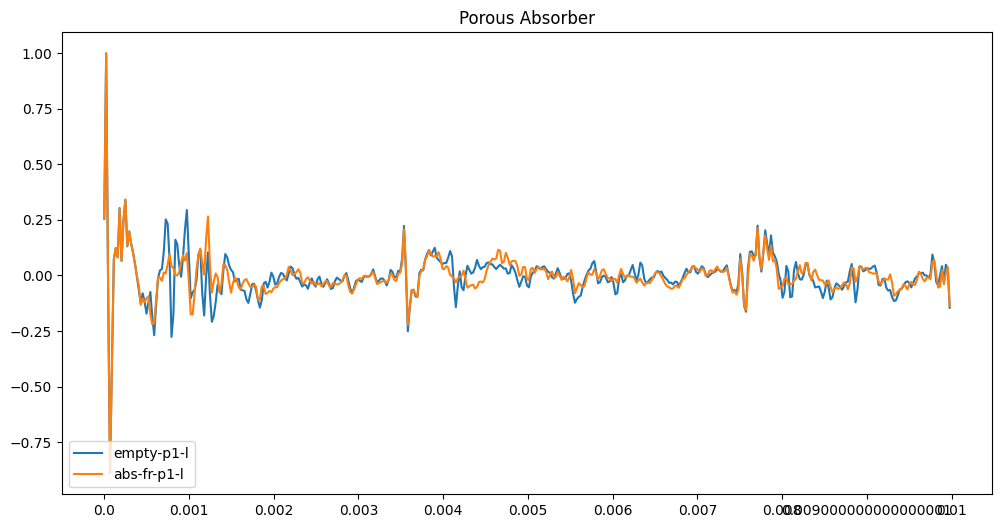

In [7]:
compare("empty-p1-l", "abs-fr-p1-l", "Porous Absorber", tmax=0.01)

### QRD

Prototype 3'x3'x4" 1D QRD N=31 vertically oriented. Blocks are rigid XPS foam, dividers are 1/8" MDF.

<img src="../images/1d-qrd-foam-front.jpg" width=500/>

Same story here. Impacted range is +/- 1ms. The magnitude of the impact appears to be less pronounced.

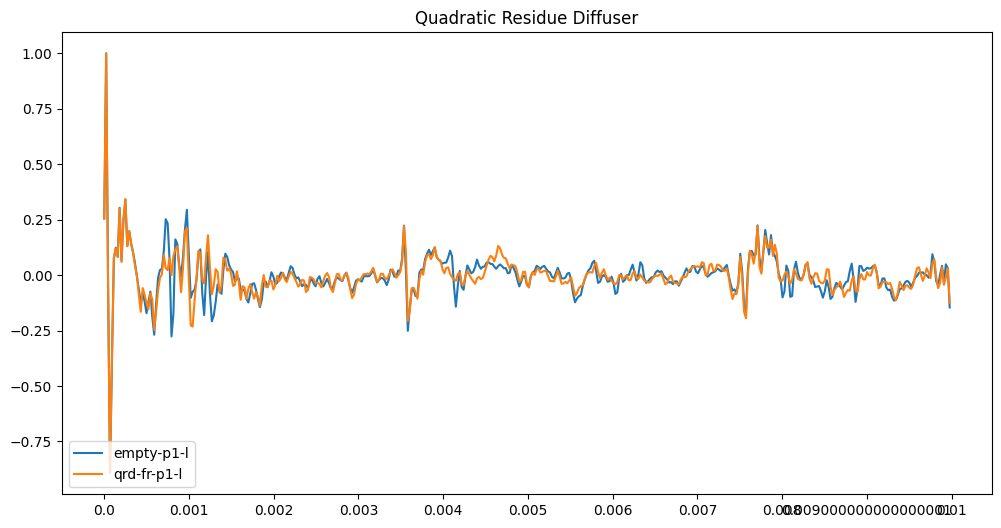

In [8]:
compare("empty-p1-l", "qrd-fr-p1-l", "Quadratic Residue Diffuser", tmax=0.01)

### Porous Absorber vs. QRD

To better visualize the impact of the two treatment options here they are compared. It is clear that the porous absorber does a slightly better job throughout the impacted range, but either would likely be an option for the first reflection point in this case and which would be preferable likely depends on priorities. If reducing the decay time is priority the porous option may be the best choice. If the decay time can be addressed with treatments elsewhere there may be a benefit to choosing the QRD option for this location

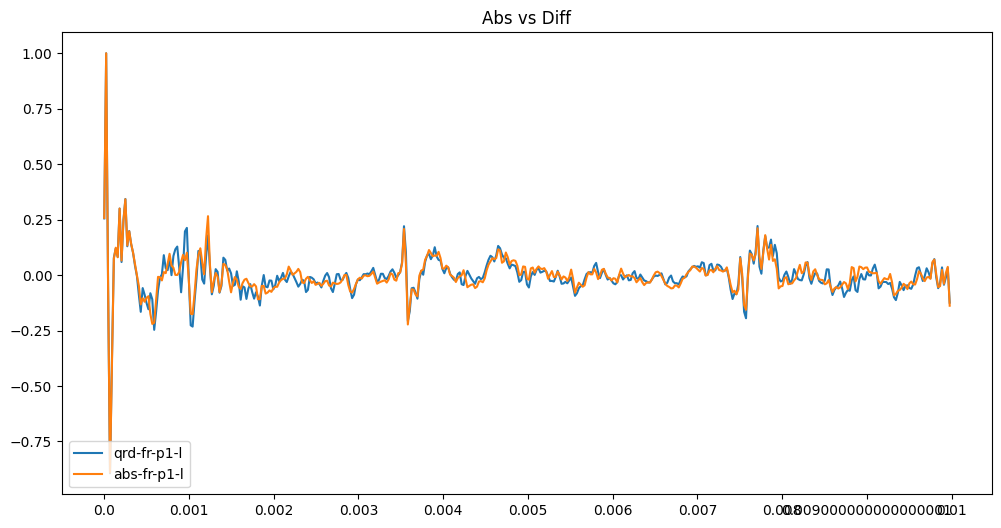

In [9]:
compare("qrd-fr-p1-l", "abs-fr-p1-l", "Abs vs Diff", tmax=0.01)